# **Big 3 Indonesian Banks**
### Author : Isaac Langit 

## **Table of contents**
1. [Introduction](#introduction)
2. [About Dataset](#aboutdataset)
3. [Questions and Problems](#QnP)
4. [Process and Analyze](#process)
5. [Conclusion](#conclusion)

## **Introduction** <a name="introduction"></a>

In this occasion, I would like to present stock comparison between top 3 big banks in Indonesia.

Here are Indonesian top 3 banks :

1. PT. Bank Rakyat Indonesia.

>Asset : Rp 825.41 trillion

>PT Bank Rakyat Indonesia (Persero) Tbk. is the oldest and largest bank by assets in Indonesia. Its history was started back on 16 December 1895, when Raden Bei Aria Wiraatmaja founded a small financial institution. It is currently one of the largest Indonesian companies in terms of market capitalization. The company operates seven levels of service offices, consisting of its head office, 18 regional offices, 446 branch offices (including three overseas offices), 545 sub-branch offices, 914 cash offices, 5,000 BRI units, 1,778 sub-micro outlets, and 350 mobile BRI outlets. 

\

2. PT. Bank Mandiri

>Asset : Rp 820.03 trillion

>PT Bank Mandiri Tbk is Indonesia’s second largest financial institution by assets. The Bank was established as a consequence of the Asian Financial Crisis, when the Indonesian financial sector had collapsed in the late 1990s and as part of the government's bank restructuring program four state-owned banks, Bank Exim, Bank Bumi Daya, Bank Dagang Negara and Bapindo, were merged into Bank Mandiri.

\

3. PT. Bank Central Asia

>Asset : Rp 605.75 trillion

>PT Bank Central Asia Tbk (BCA) is Indonesia’s 3 largest bank in assets and its largest lender by market value. BCA is partly controlled by one of Indonesias most renowned and sizable conglomertes,the Djarum Group. It provides both commercial and personal banking services through it’s over 1000 branches in Indonesia.

Source : [Macropolis : Top Banks in Indonesia](https://marcopolis.net/top-banks-in-indonesia.htm)


At the end of this report, there will be several deliverables:
1. Stock price in the last 5 months for each banks,
2. Stock price comparison,
3. Stock price correlation,
4. Documentation of manipulating data,
5. An analysis summary,
6. Supporting visualizations and key findings,
7. Conclusion based on findings.


### **Tools I used**
I used Google Colab with Python programming language for analyzing dataset and wrote this notebook. The visualization was created using Python, Matplotlib library, and Seaborn library. The stock historical data was genereted using yfinance from yahoo finance and the plot was created using mplfincance library.


## Questions
1. Are there any external factors that affect the stock price of each bank, such as the exchange rate of the rupiah against the usd, and the price of gold?
2. Has the stock price of the bank increased or decreased in the last 5 months?
3. Is there a correlation or relationship between the 3 banks?

In [1]:
# Import and install library
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install yfinance
!pip install --upgrade mplfinance
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The first thing to do is determine the time range to be used. In this calculation, This notebook will show the stock price for the last 5 months from today. In addition, it is necessary to determine the appropriate UTC or timezone. This notebook used jakarta as a timezone.

In [2]:
# Importing the datetime module using realtime datetime and Jakarta timezone
import datetime
import pytz
from dateutil.relativedelta import relativedelta
end = datetime.datetime.now(pytz.timezone('Asia/Jakarta'))
start = end - relativedelta(month=5)
print(end)
print(start)

2022-10-09 22:28:21.852697+07:00
2022-05-09 22:28:21.852697+07:00


After determining the time range, the next step is downloaded the stock historical price data from [yahoo finance](https://finance.yahoo.com/) website and put it in spesific dataframe.

In [3]:
# Download stock historical data
BBCA = yf.download("BBCA.JK", start, end)
BBNI = yf.download("BBNI.JK", start, end)
BMRI = yf.download("BMRI.JK", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
print(BBCA.head())

                             Open    High     Low   Close  Adj Close  \
Date                                                                   
2022-05-09 00:00:00+07:00  7875.0  7900.0  7600.0  7600.0     7600.0   
2022-05-10 00:00:00+07:00  7250.0  7600.0  7250.0  7525.0     7525.0   
2022-05-11 00:00:00+07:00  7525.0  7700.0  7450.0  7650.0     7650.0   
2022-05-12 00:00:00+07:00  7525.0  7550.0  7275.0  7275.0     7275.0   
2022-05-13 00:00:00+07:00  7250.0  7475.0  7250.0  7325.0     7325.0   

                              Volume  
Date                                  
2022-05-09 00:00:00+07:00  456796600  
2022-05-10 00:00:00+07:00  268445700  
2022-05-11 00:00:00+07:00  156535200  
2022-05-12 00:00:00+07:00  240529600  
2022-05-13 00:00:00+07:00  212968600  


In [5]:
print(BBCA.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2022-05-09 00:00:00+07:00 to 2022-10-07 00:00:00+07:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       106 non-null    float64
 1   High       106 non-null    float64
 2   Low        106 non-null    float64
 3   Close      106 non-null    float64
 4   Adj Close  106 non-null    float64
 5   Volume     106 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.8 KB
None


# Bank BCA
The following is the stock price of BCA bank in rupiah for the last five months and is depicted in a candlestick chart.

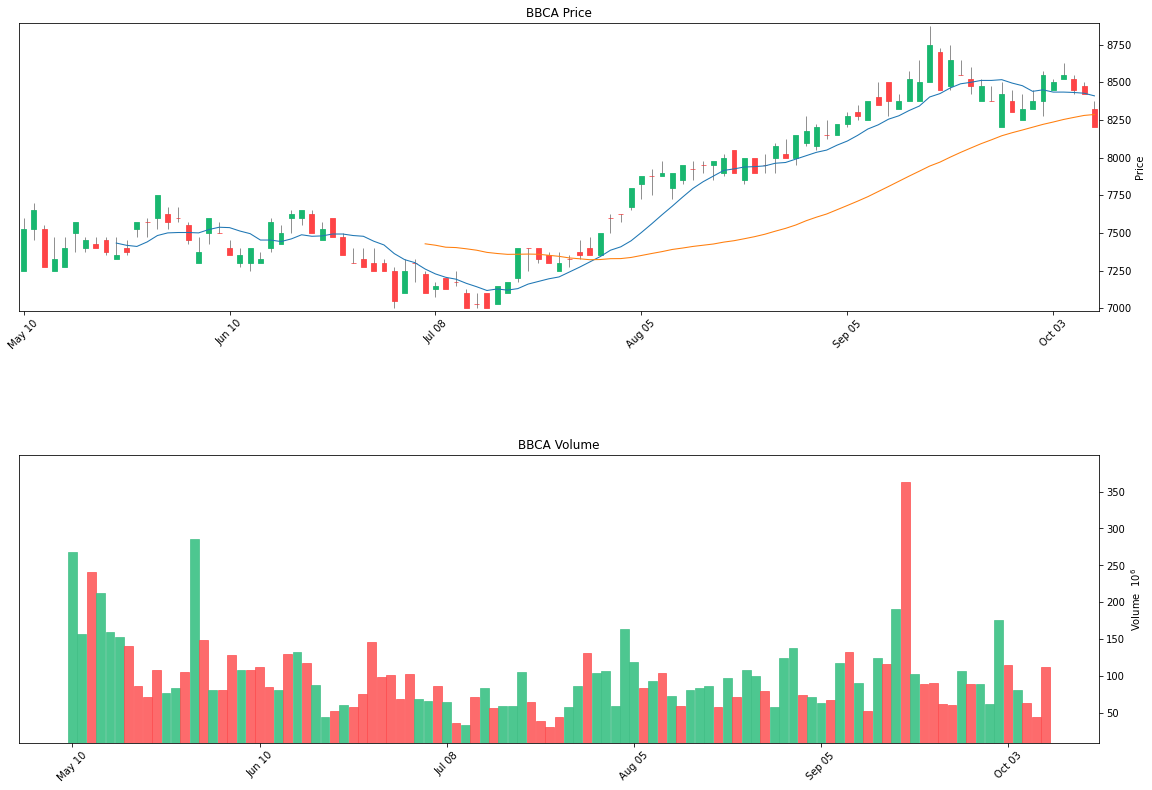

In [8]:
# Define and seperate plot into two axes, ax1 for prince and ax2 for volume
fig = plt.figure(figsize=(15,10))
ax1 = plt.axes([0,0,1,0.4])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

# Plot configuration
config = dict(
    style="yahoo",
    type="candle",
    mav=(10,40),
    volume=ax1,
    ax=ax2,
    num_panels=2,
    tight_layout=True
)
# Plot
ax1.set_title("BBCA Volume")
ax2.set_title("BBCA Price")
fig = mpf.plot(BBCA[start:end], **config)

BCA's stock price decreased in July and has risen again until now.

## Bank BNI
The following is the stock price of BNI bank in rupiah for the last five months and is depicted in a candlestick chart.

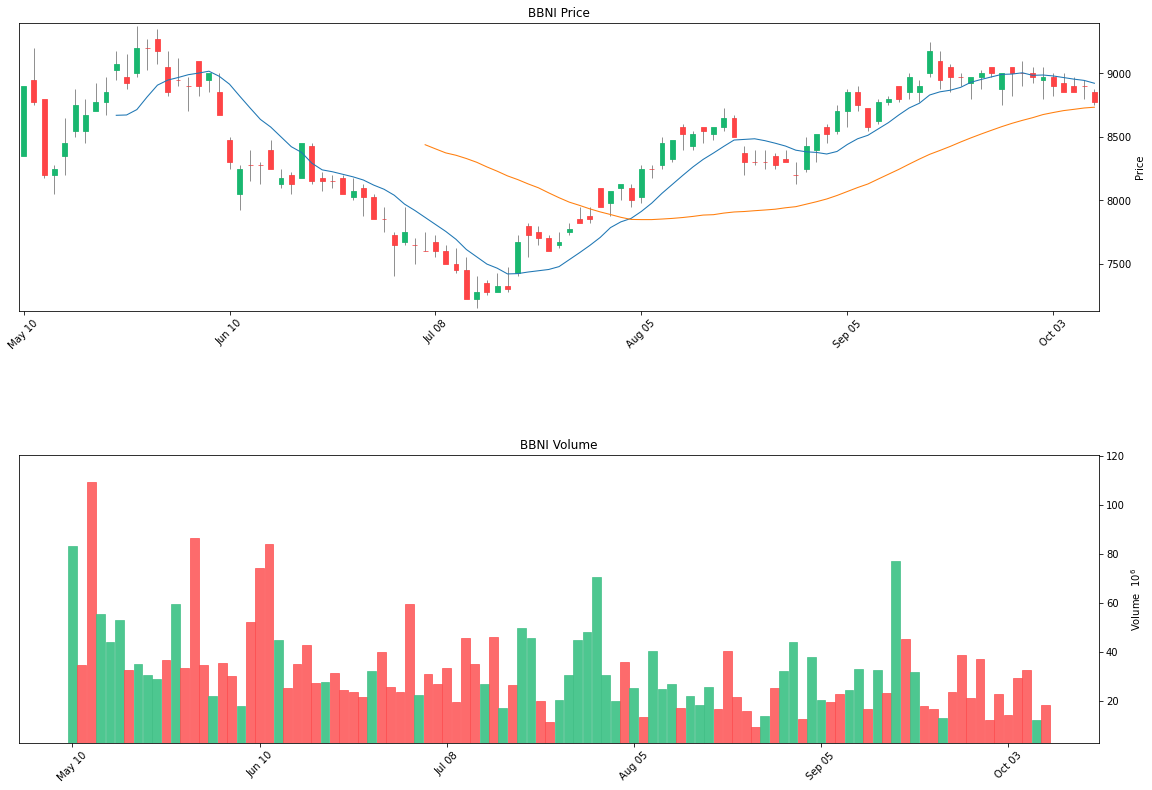

In [9]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.axes([0,0,1,0.4])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


config = dict(
    style="yahoo",
    type="candle",
    mav=(10,40),
    volume=ax1,
    ax=ax2,
    num_panels=2,
    tight_layout=True
)

ax1.set_title("BBNI Volume")
ax2.set_title("BBNI Price")
fig = mpf.plot(BBNI[start:end], **config)

Just like BCA, BNI's share price decreased in July and has risen again until now.

## Bank Mandiri

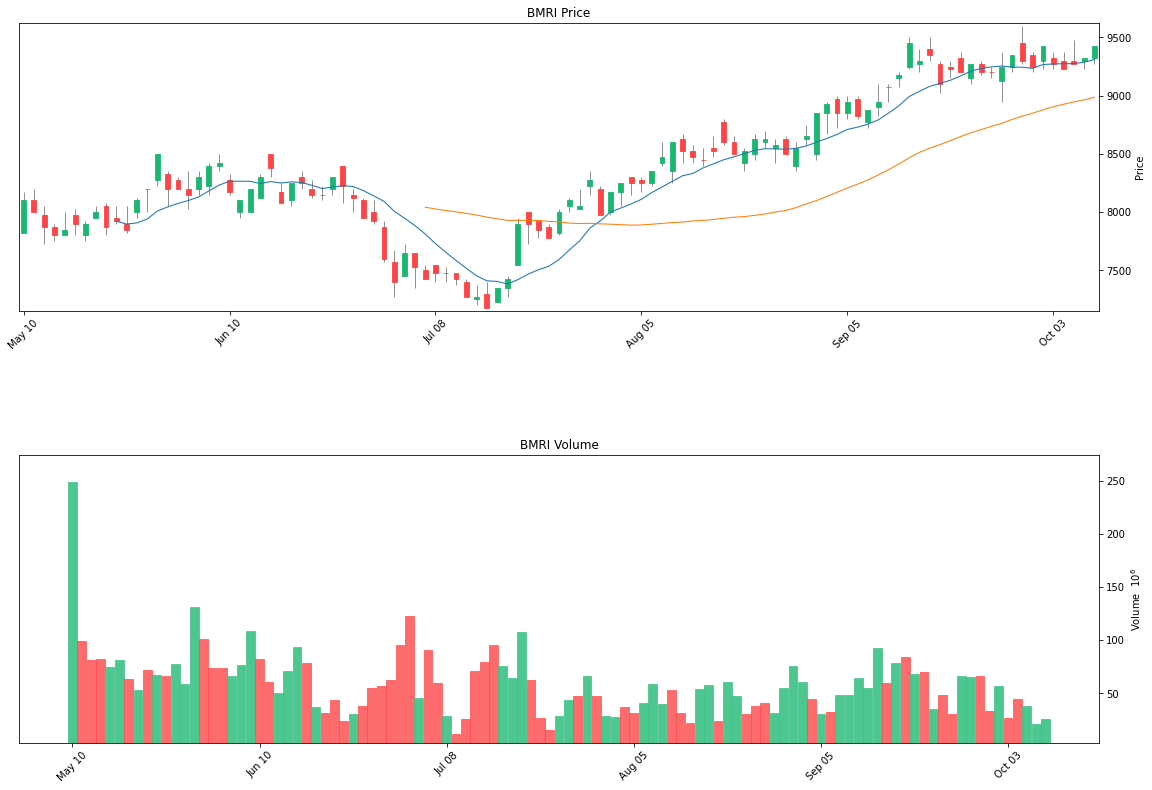

In [10]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.axes([0,0,1,0.4])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


config = dict(
    style="yahoo",
    type="candle",
    mav=(10,40),
    volume=ax1,
    ax=ax2,
    num_panels=2,
    tight_layout=True
)

ax1.set_title("BMRI Volume")
ax2.set_title("BMRI Price")
fig = mpf.plot(BMRI[start:end], **config)

Just like BCA and BNI, Mandiri's share price decreased in July and has risen again until now.

## Correlation between banks
The following will explain the correlation and relationship between bank stock prices with one another. The first is to combine data between BCA, BNI, and BRI banks into one data frame.

In [11]:
# Create new dataframe with just closing price for each stock
df = pd.DataFrame({'BBCA': BBCA['Adj Close'], 'BBNI': BBNI['Adj Close'],
                   'BMRI': BMRI['Adj Close']})
df.head(2)

,BBCA,BBNI,BMRI
Date,,,
2022-05-09 00:00:00+07:00,7600.0,8825.0,8325.0
2022-05-10 00:00:00+07:00,7525.0,8900.0,8100.0


Text(0, 0.5, 'Price')

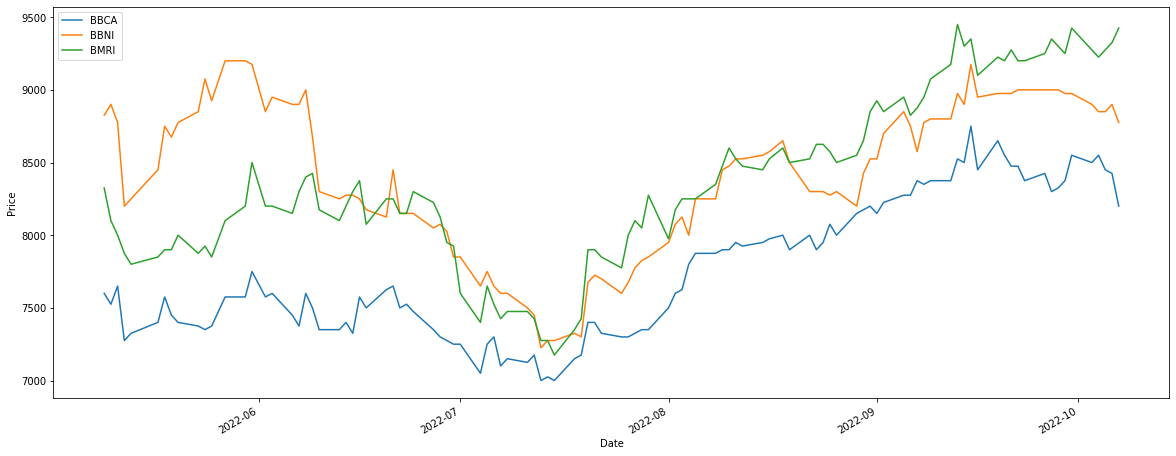

In [12]:
# Plot the dataframe
df.plot(figsize=(20,8))
plt.ylabel('Price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

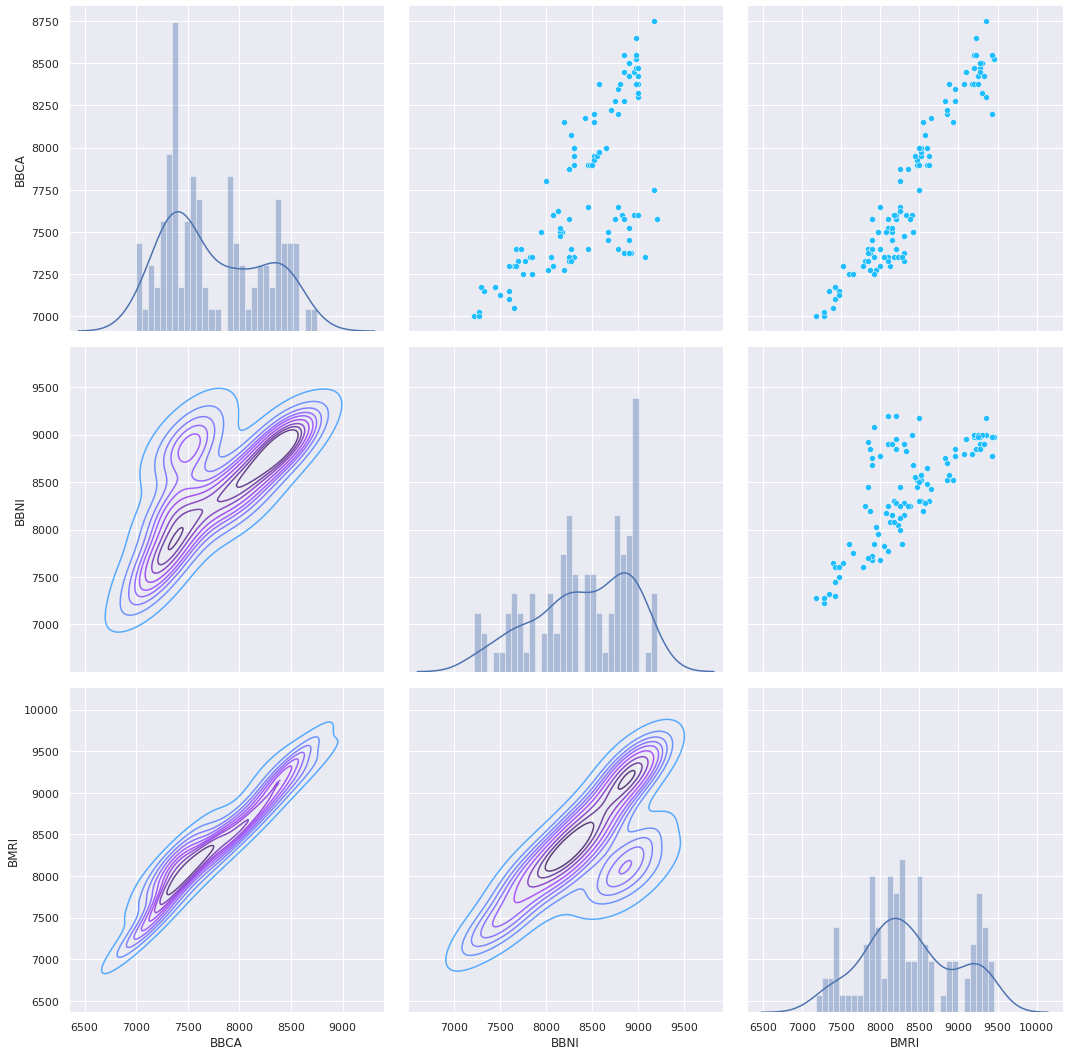

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.PairGrid(df, height=5)
fig.map_upper(sns.scatterplot, color='#20BEFF')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30)

There is a slight positive correlation between the three banks, especially between Mandiri and BCA. The following is the correlation between Bank Mandiri and BCA which shows a positive correlation:

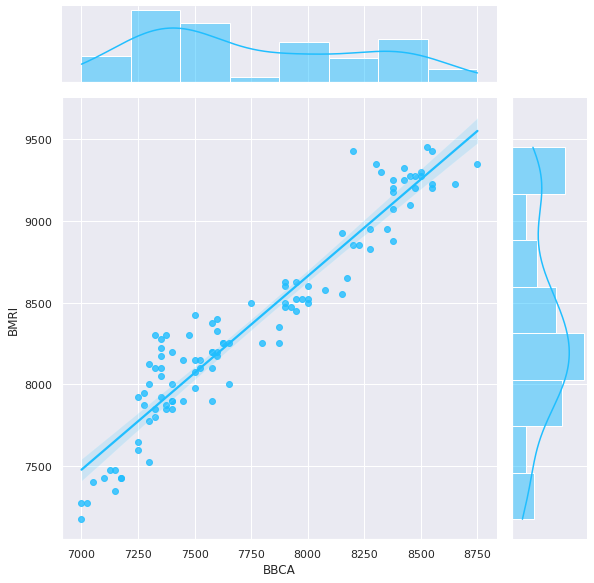

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.jointplot(x='BBCA', y='BMRI', data=df, kind='reg', height=8.27, color='#20BEFF')

## Does currency exchange rates affect bank stock prices?

It is necessary to take historical data again on yahoo finance about the rupiah exchange rate with US dollar.

In [15]:
USDIDR = yf.download("IDR=X", start, end)
print(USDIDR)

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Date                                                                  
2022-05-09 00:00:00+01:00  14490.000000  14594.900391  14490.000000   
2022-05-10 00:00:00+01:00  14552.200195  14620.799805  14508.500000   
2022-05-11 00:00:00+01:00  14520.799805  14560.799805  14490.400391   
2022-05-12 00:00:00+01:00  14543.400391  14671.599609  14523.700195   
2022-05-13 00:00:00+01:00  14632.099609  14669.500000  14589.700195   
...                                 ...           ...           ...   
2022-10-03 00:00:00+01:00  15221.000000  15362.900391  15221.000000   
2022-10-04 00:00:00+01:00  15290.000000  15309.500000  15175.400391   
2022-10-05 00:00:00+01:00  15180.000000  15245.000000  15142.400391   
2022-10-07 00:00:00+01:00  15215.799805  15285.500000  15181.000000   
2022-10-08 00:00:00+01:00  15243.000000  15250.000000  15243.000000   

       

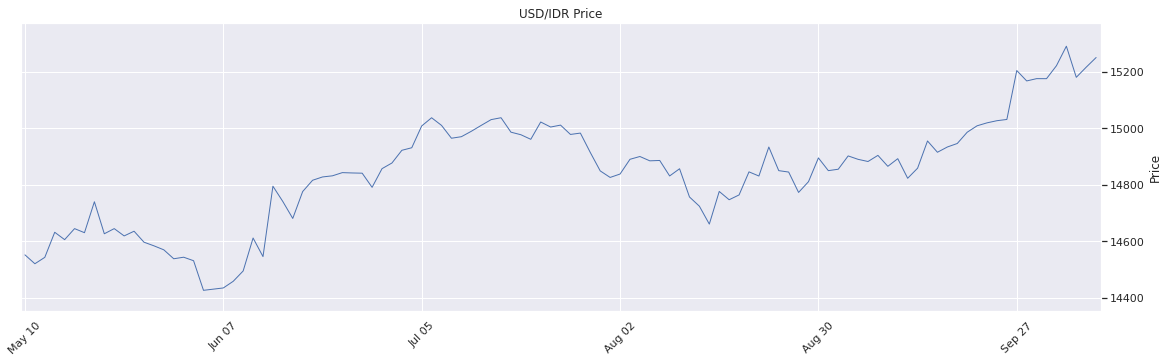

In [16]:
fig = plt.figure(figsize=(15,10))
ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")

config2 = dict(
    style="yahoo",
    type="line",
    ax=ax2,
    tight_layout=True
)

ax2.set_title("USD/IDR Price")
fig = mpf.plot(USDIDR[start:end], **config2)

Then combined the rupiah price data with bank stock price data in one dataframe

In [17]:
BBCAtoUSD = BBCA.copy()
BBNItoUSD = BBNI.copy()
BMRItoUSD = BMRI.copy()
USDtoIDR  = USDIDR.copy()

BBCAtoUSD.index = BBCA.index.date
BBNItoUSD.index = BBNI.index.date
BMRItoUSD.index = BMRI.index.date
USDtoIDR.index = USDIDR.index.date

# Localize timezone from naive to aware :
#USDtoIDR = USDtoIDR.tz_localize(tz='Asia/Jakarta')

#print(BBCA.head())
#print(BBCAtoUSD.head())
#print(USDIDR.head())
#print(USDtoIDR.head())

In [18]:
dfUSD = pd.DataFrame({'BBCA': BBCAtoUSD['Adj Close'], 'BBNI': BBNItoUSD['Adj Close'],
                   'BMRI': BMRItoUSD['Adj Close'], 'USD/IDR': USDtoIDR['Adj Close']})
dfUSD = dfUSD.dropna()
dfUSD.head(10)

,BBCA,BBNI,BMRI,USD/IDR
2022-05-09,7600.0,8825.0,8325.0,14490.000000
2022-05-10,7525.0,8900.0,8100.0,14552.200195
2022-05-11,7650.0,8775.0,8000.0,14520.799805
2022-05-12,7275.0,8200.0,7875.0,14543.400391
2022-05-13,7325.0,8250.0,7800.0,14632.099609
2022-05-17,7400.0,8450.0,7850.0,14645.000000
2022-05-18,7575.0,8750.0,7900.0,14630.599609
2022-05-19,7450.0,8675.0,7900.0,14740.000000
2022-05-20,7400.0,8775.0,8000.0,14626.799805
2022-05-23,7375.0,8850.0,7875.0,14645.000000


Text(0, 0.5, 'Price')

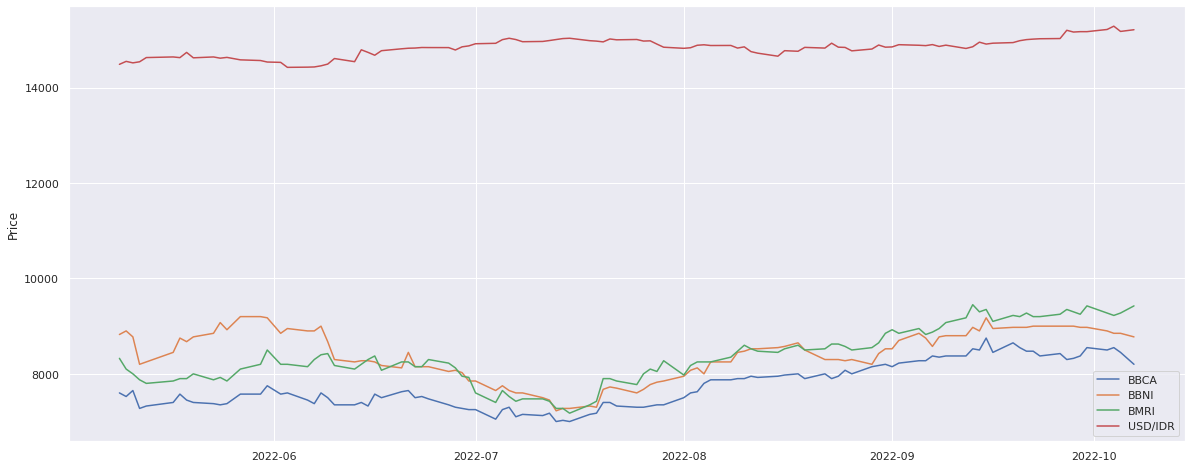

In [19]:
dfUSD.plot(figsize=(20,8))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

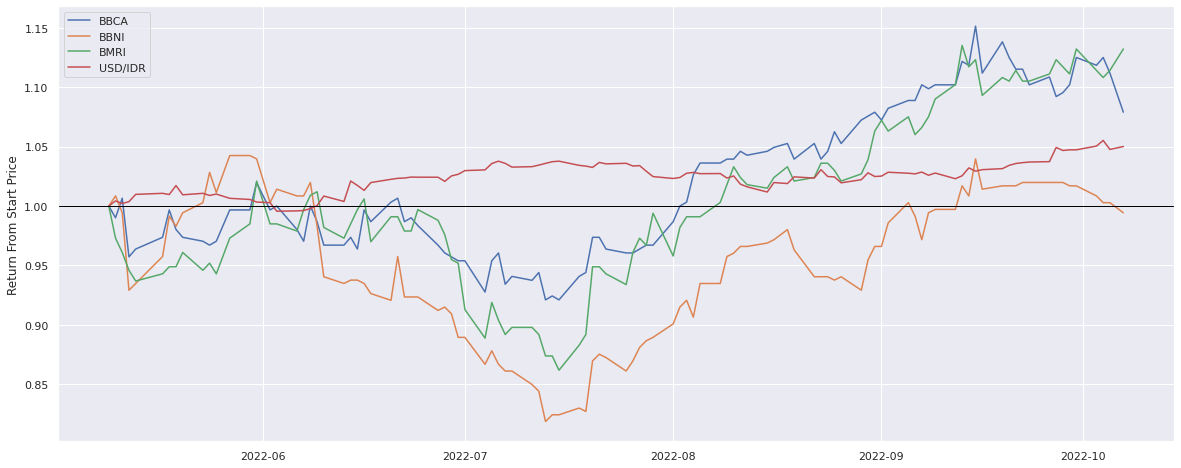

In [20]:
returnfstart = dfUSD.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(20,8)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

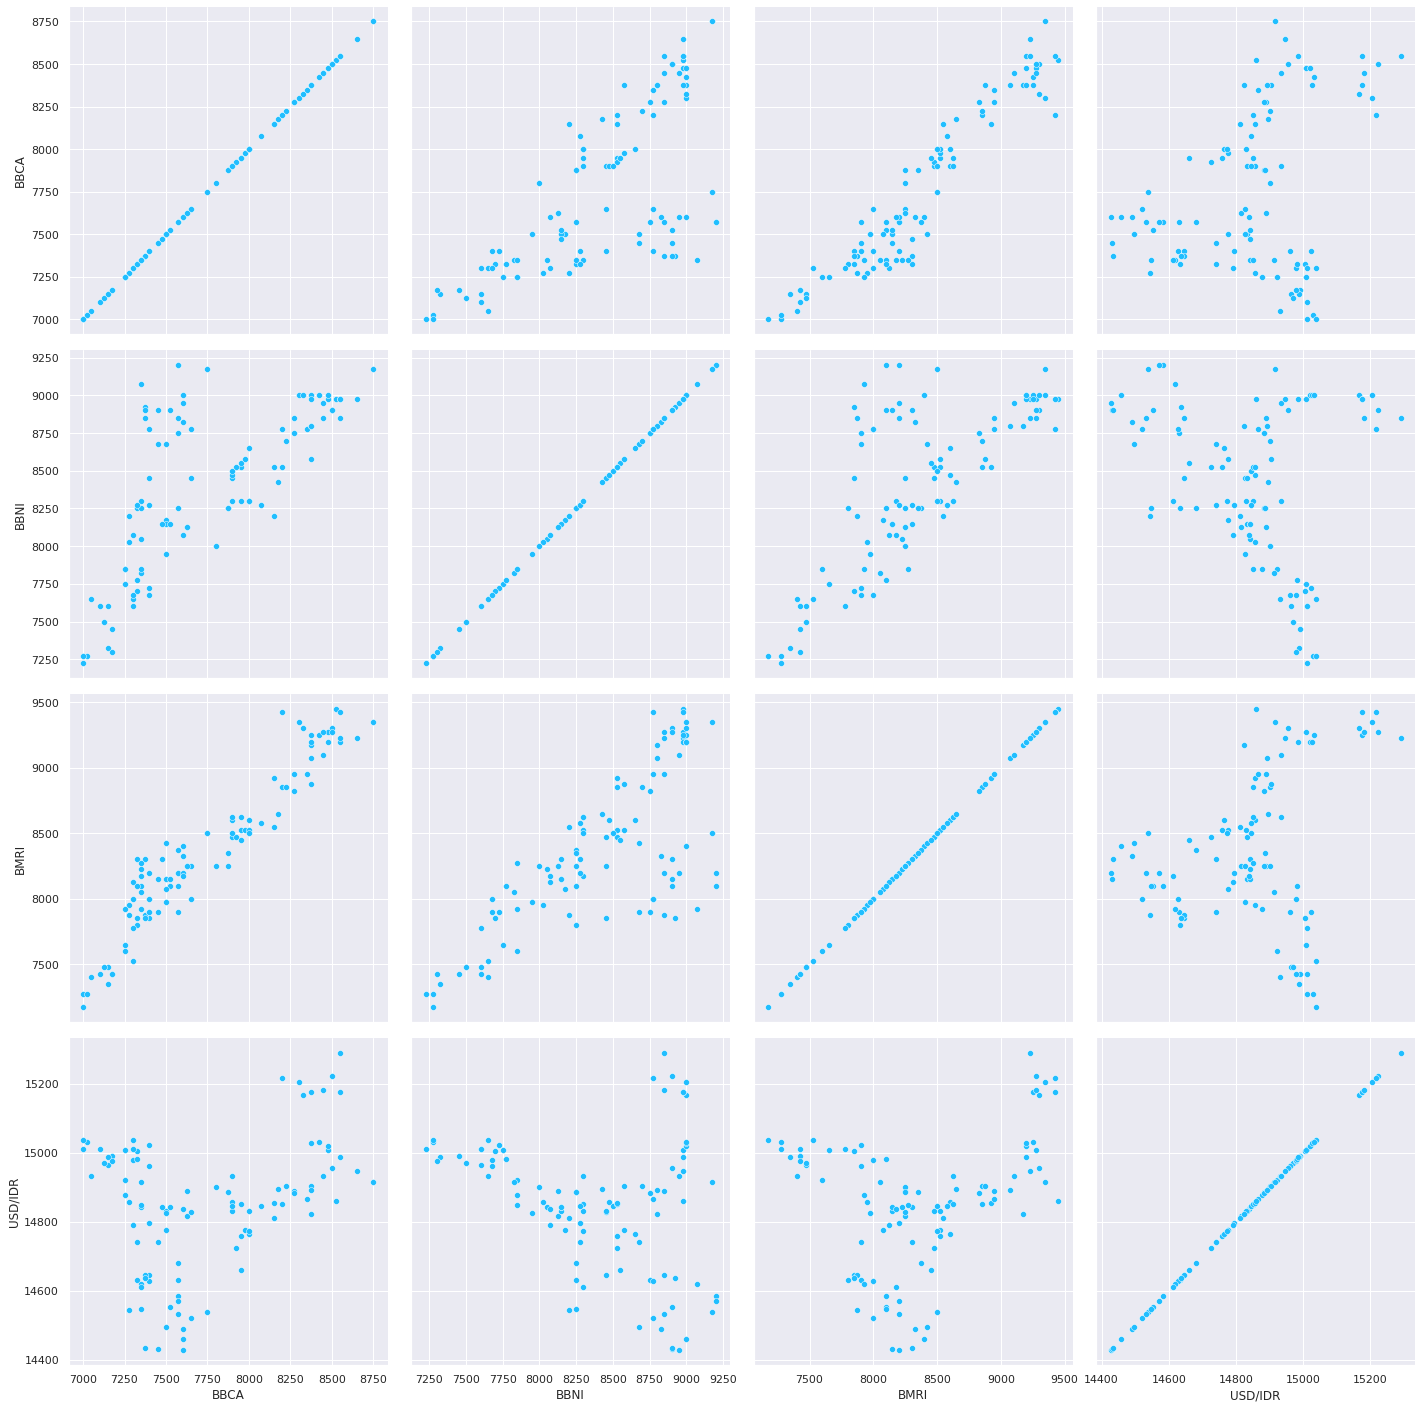

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.PairGrid(dfUSD, height=5)
fig.map(sns.scatterplot, color='#20BEFF')

From the diagram above, it can be seen that there is no correlation between the rupiah exchange rate and the bank's stock price. However, there is a slight negative correlation between BNI bank stock prices with currency exchange rates, when the dollar price rises or the rupiah weakens, the stock price drops.

## Does gold prices affect bank stock prices?

In [22]:
GOLD = yf.download("ANTM.JK", start, end)
print(GOLD.head())

[*********************100%***********************]  1 of 1 completed
                             Open    High     Low   Close    Adj Close  \
Date                                                                     
2022-05-09 00:00:00+07:00  2500.0  2550.0  2460.0  2530.0  2490.798584   
2022-05-10 00:00:00+07:00  2470.0  2490.0  2360.0  2420.0  2382.502930   
2022-05-11 00:00:00+07:00  2420.0  2530.0  2400.0  2400.0  2362.812744   
2022-05-12 00:00:00+07:00  2400.0  2460.0  2290.0  2330.0  2293.897461   
2022-05-13 00:00:00+07:00  2360.0  2380.0  2300.0  2330.0  2293.897461   

                              Volume  
Date                                  
2022-05-09 00:00:00+07:00  165439100  
2022-05-10 00:00:00+07:00  146403900  
2022-05-11 00:00:00+07:00  110097300  
2022-05-12 00:00:00+07:00  183788200  
2022-05-13 00:00:00+07:00   81842400  


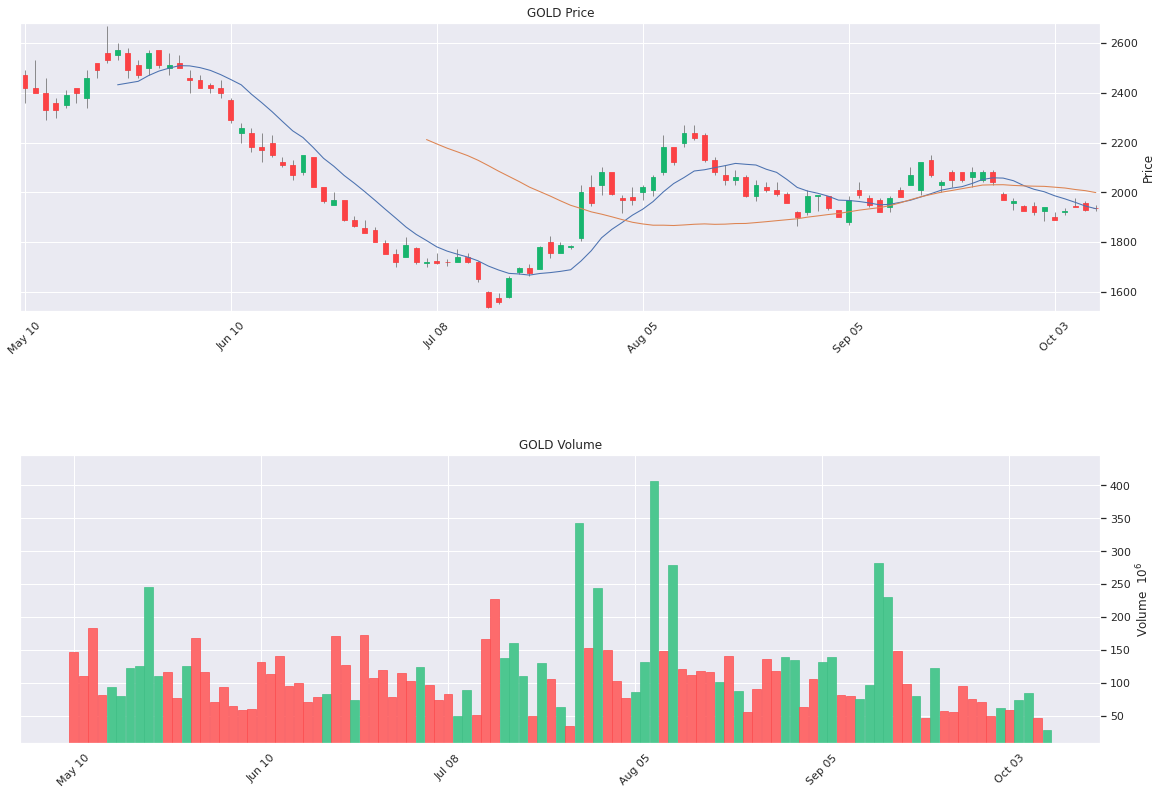

In [23]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.axes([0,0,1,0.4])
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax2 = plt.axes([0,0.6,1,0.4])
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


config = dict(
    style="yahoo",
    type="candle",
    mav=(10,40),
    volume=ax1,
    ax=ax2,
    num_panels=2,
    tight_layout=True
)

ax1.set_title("GOLD Volume")
ax2.set_title("GOLD Price")
fig = mpf.plot(GOLD[start:end], **config)

In [25]:
dfGOLD = pd.DataFrame({'BBCA': BBCA['Adj Close'], 'BBNI': BBNI['Adj Close'],
                   'BMRI': BMRI['Adj Close'], 'GOLD': GOLD['Adj Close']})
dfGOLD.head(10)

,BBCA,BBNI,BMRI,GOLD
Date,,,,
2022-05-09 00:00:00+07:00,7600.0,8825.0,8325.0,2490.798584
2022-05-10 00:00:00+07:00,7525.0,8900.0,8100.0,2382.502930
2022-05-11 00:00:00+07:00,7650.0,8775.0,8000.0,2362.812744
2022-05-12 00:00:00+07:00,7275.0,8200.0,7875.0,2293.897461
2022-05-13 00:00:00+07:00,7325.0,8250.0,7800.0,2293.897461
2022-05-17 00:00:00+07:00,7400.0,8450.0,7850.0,2352.967773
2022-05-18 00:00:00+07:00,7575.0,8750.0,7900.0,2362.812744
2022-05-19 00:00:00+07:00,7450.0,8675.0,7900.0,2421.883057
2022-05-20 00:00:00+07:00,7400.0,8775.0,8000.0,2451.418213


Text(0, 0.5, 'Price')

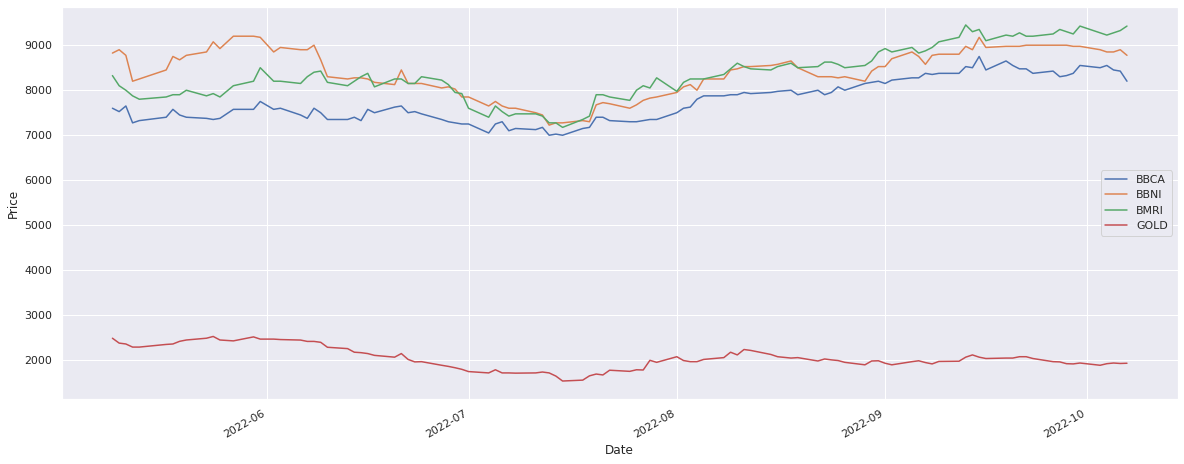

In [26]:
dfGOLD.plot(figsize=(20,8))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

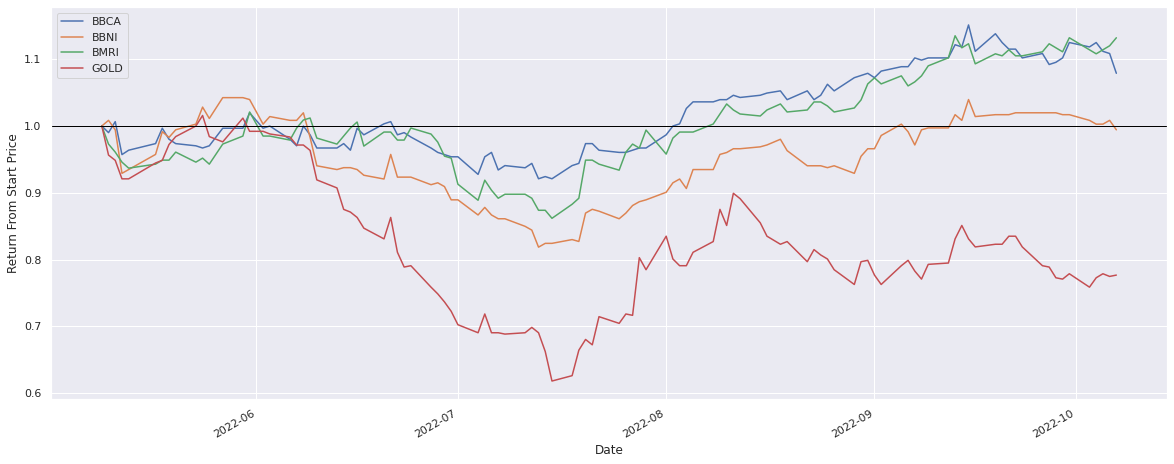

In [27]:
returnfstart = dfGOLD.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(20,8)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

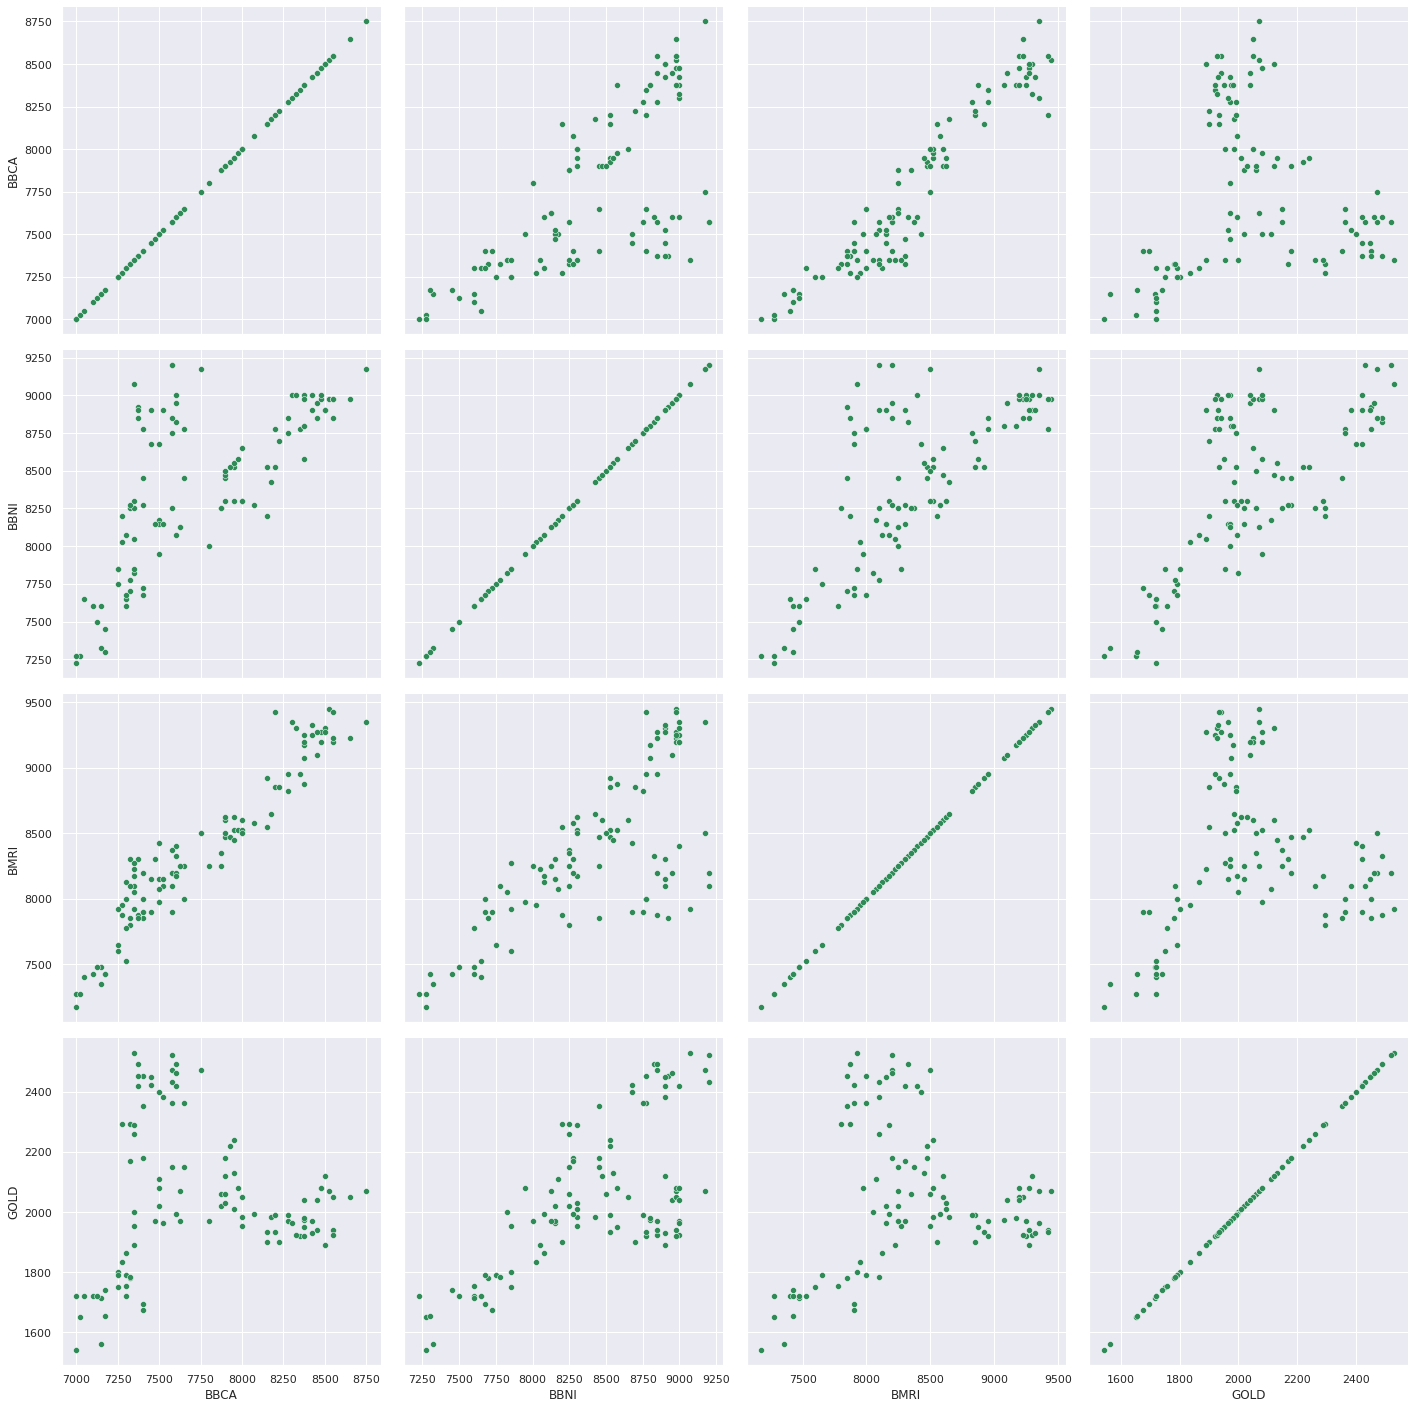

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.PairGrid(dfGOLD, height=5)
fig.map(sns.scatterplot, color='seagreen')

there is a slight positive correlation between BNI bank stock prices and gold stock prices, when gold stock prices rise, BNI bank stock prices also rise.

## Correlation between gold price and currency exchange rates

In [30]:
GOLDtoUSD = GOLD.copy()

GOLDtoUSD.index = GOLD.index.date

print(GOLDtoUSD.head())

              Open    High     Low   Close    Adj Close     Volume
2022-05-09  2500.0  2550.0  2460.0  2530.0  2490.798584  165439100
2022-05-10  2470.0  2490.0  2360.0  2420.0  2382.502930  146403900
2022-05-11  2420.0  2530.0  2400.0  2400.0  2362.812744  110097300
2022-05-12  2400.0  2460.0  2290.0  2330.0  2293.897461  183788200
2022-05-13  2360.0  2380.0  2300.0  2330.0  2293.897461   81842400


In [31]:
dfGOLDtoUSD = pd.DataFrame({'GOLD': GOLDtoUSD['Adj Close'], 'USD/IDR': USDtoIDR['Adj Close']})
dfGOLDtoUSD = dfGOLDtoUSD.dropna()
dfGOLDtoUSD.head(10)

,GOLD,USD/IDR
2022-05-09,2490.798584,14490.000000
2022-05-10,2382.502930,14552.200195
2022-05-11,2362.812744,14520.799805
2022-05-12,2293.897461,14543.400391
2022-05-13,2293.897461,14632.099609
2022-05-17,2352.967773,14645.000000
2022-05-18,2362.812744,14630.599609
2022-05-19,2421.883057,14740.000000
2022-05-20,2451.418213,14626.799805
2022-05-23,2490.798584,14645.000000


Text(0, 0.5, 'Price')

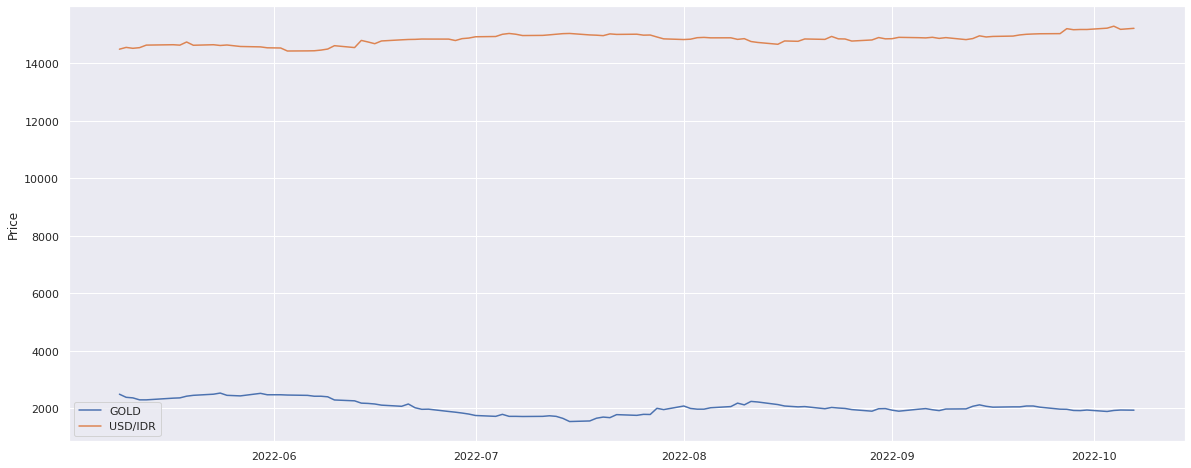

In [32]:
dfGOLDtoUSD.plot(figsize=(20,8))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

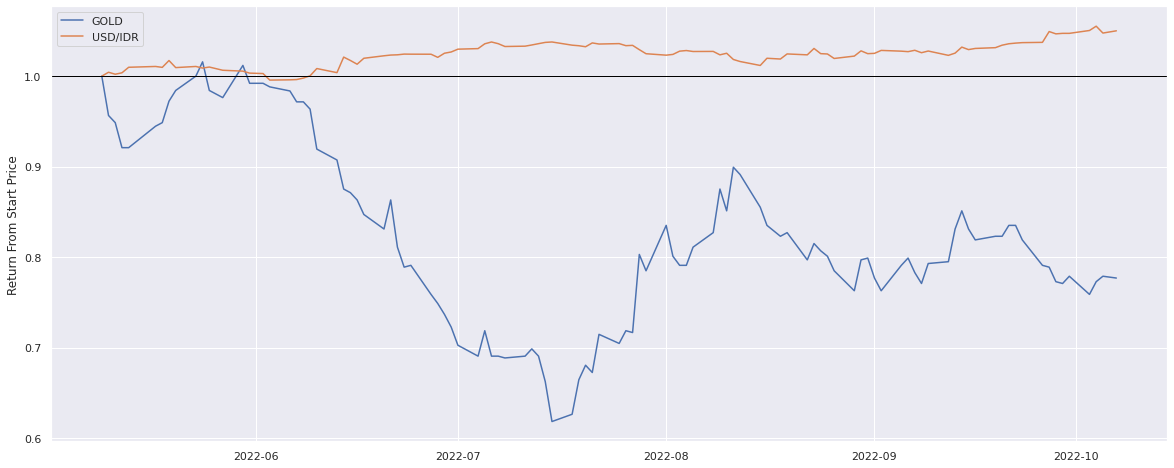

In [33]:
returnfstart = dfGOLDtoUSD.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(20,8)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

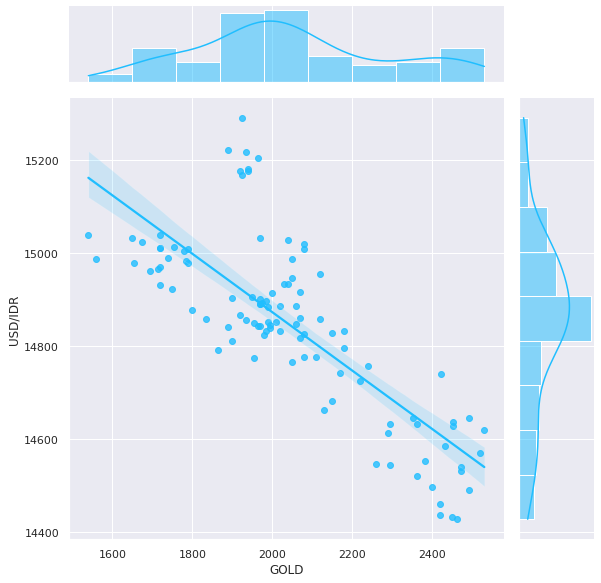

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.jointplot(x='GOLD', y='USD/IDR', data=dfGOLDtoUSD, kind='reg', height=8.27, color='#20BEFF')

There is a negative correlation between currency exchange rates and gold prices, the more expensive the dollar, or the lower the value of the rupiah, the more expensive gold prices will be.